In [ ]:
from keras.datasets import mnist
from keras.utils import to_categorical
from keras import layers
from keras import models
import matplotlib.pyplot as plt


In [ ]:
# https://www.youtube.com/watch?v=9cPMFTwBdM4

(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Cambiamos el tensor a un tensor de grado 4 (la ultima posición representa el numero de canales de colores en este caso 1) y normalizamos los valores
print(x_train.shape)
x_train = x_train.reshape((-1, 28, 28,1))
x_train = x_train.astype('float32') / 255
print(x_train.shape)
x_test = x_test.reshape((-1, 28, 28,1))
x_test = x_test.astype('float32') / 255

(60000, 28, 28)
(60000, 28, 28, 1)


In [ ]:
# Hacemos one hot encoding a los labels
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [ ]:
# Seteamos los parametros del modelo
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape = (28,28,1)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(10, activation = 'softmax'))

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 3, 3, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 576)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 93,322 (364.54 KB)

 Trainable params: 93,322 (364.54 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer = 'rmsprop',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

In [ ]:
model.fit(x_train, y_train, epochs=5, batch_size= 64)


Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 71s 71ms/step - accuracy: 0.8690 - loss: 0.4053
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 74s 63ms/step - accuracy: 0.9840 - loss: 0.0516
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 78s 58ms/step - accuracy: 0.9898 - loss: 0.0334
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 84s 60ms/step - accuracy: 0.9925 - loss: 0.0252
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 79s 57ms/step - accuracy: 0.9946 - loss: 0.0172


In [ ]:
model.evaluate(x_test, y_test)[1]

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9898 - loss: 0.0323


0.9922999739646912

In [ ]:
# https://www.kaggle.com/code/arpitjain007/guide-to-visualize-filters-and-feature-maps-in-cnn#Tutorial-Overview
for i in range(len(model.layers)):
    layer = model.layers[i]
    if 'conv' not in layer.name:
        continue
    print(i , layer.name , layer.output.shape)


0 conv2d (None, 26, 26, 32)
2 conv2d_1 (None, 11, 11, 64)
4 conv2d_2 (None, 3, 3, 64)


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


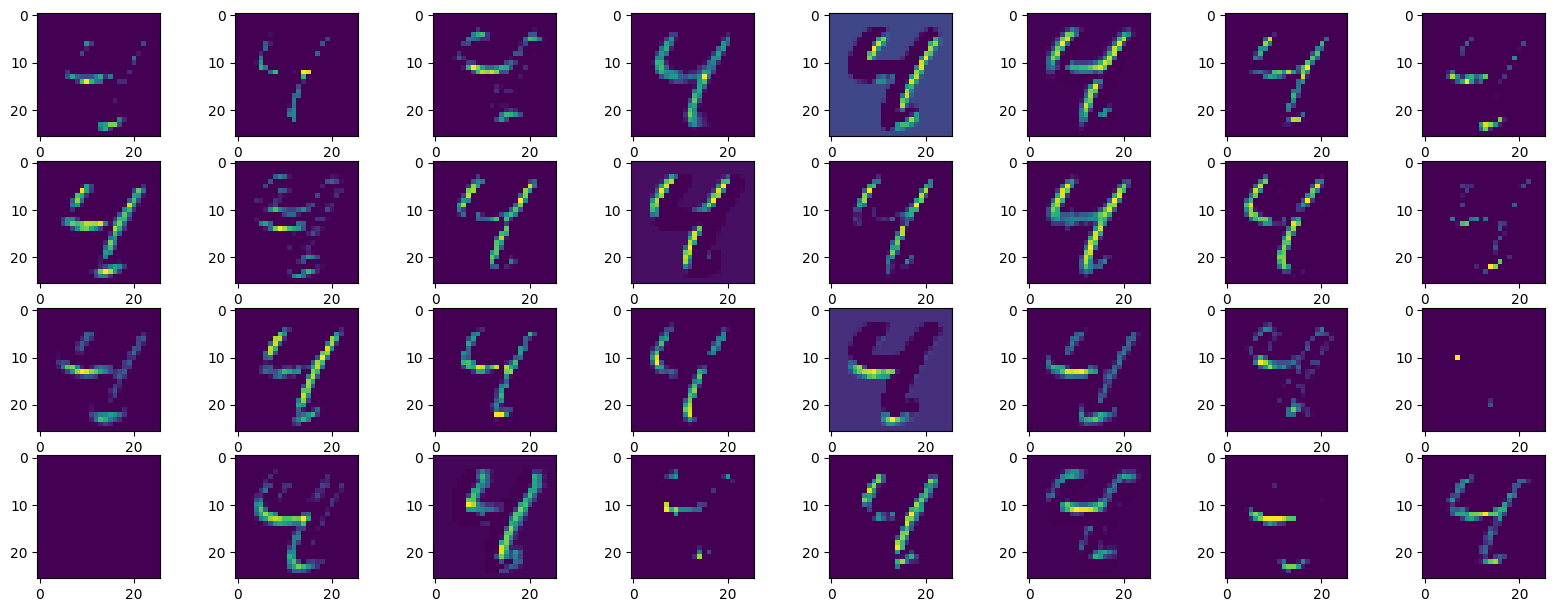

In [ ]:
# Agarramos el layer que queremos visualizar
model2 = models.Model(inputs=model.inputs , outputs=model.layers[0].output)

# Calculamos el features_map
features = model2.predict(x_test)

# Visualizamos los feature maps
fig = plt.figure(figsize=(20,15))
for i in range(1,features.shape[3]+1):

    plt.subplot(8,8,i) # Esto indica cuantas filas y columnas va a haber de graficos y que index de grafico es el actual
    plt.imshow(features[6,:,:,i-1]) # Para cambiar el numero cambiar el primer index

plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step


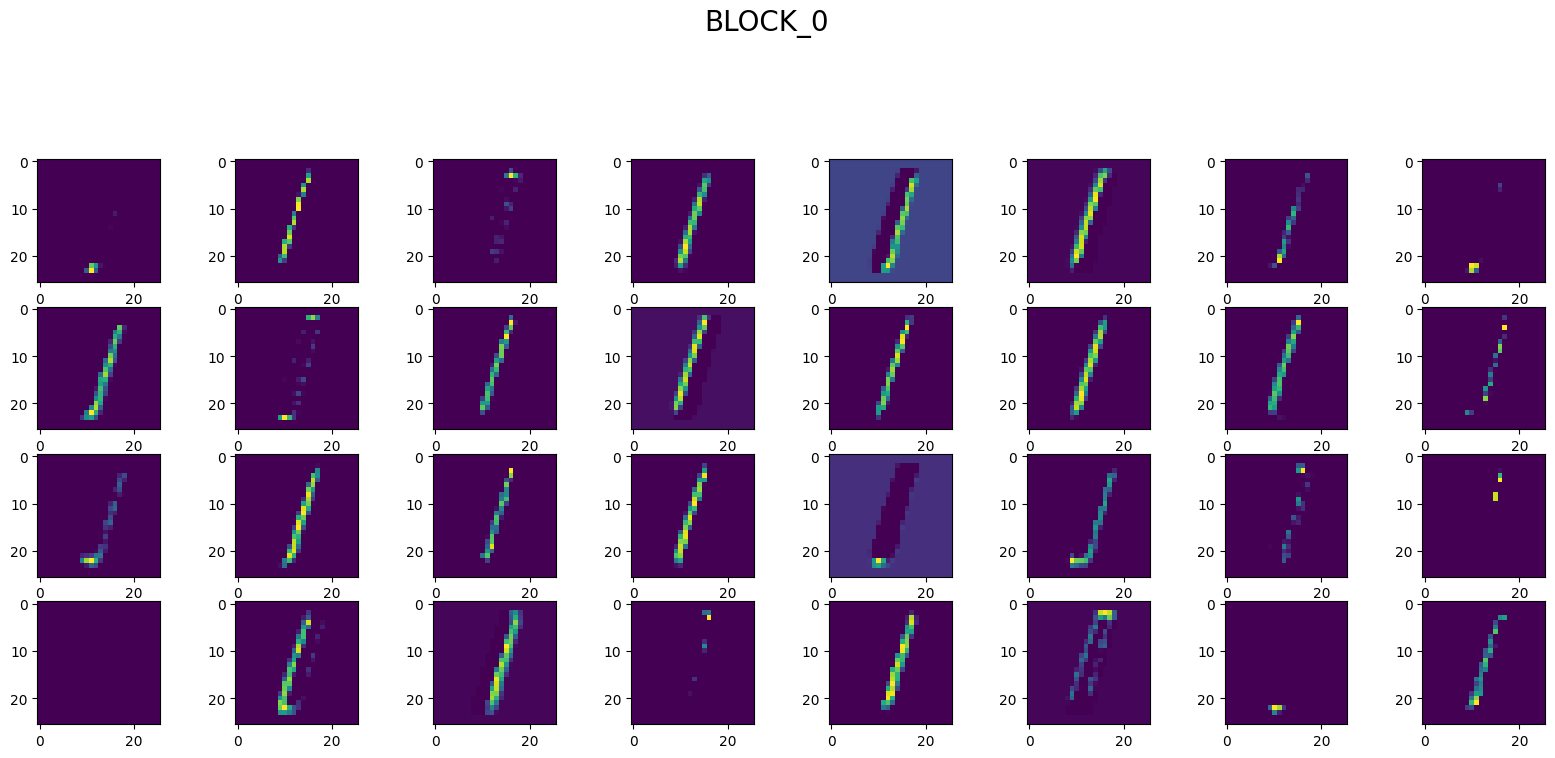

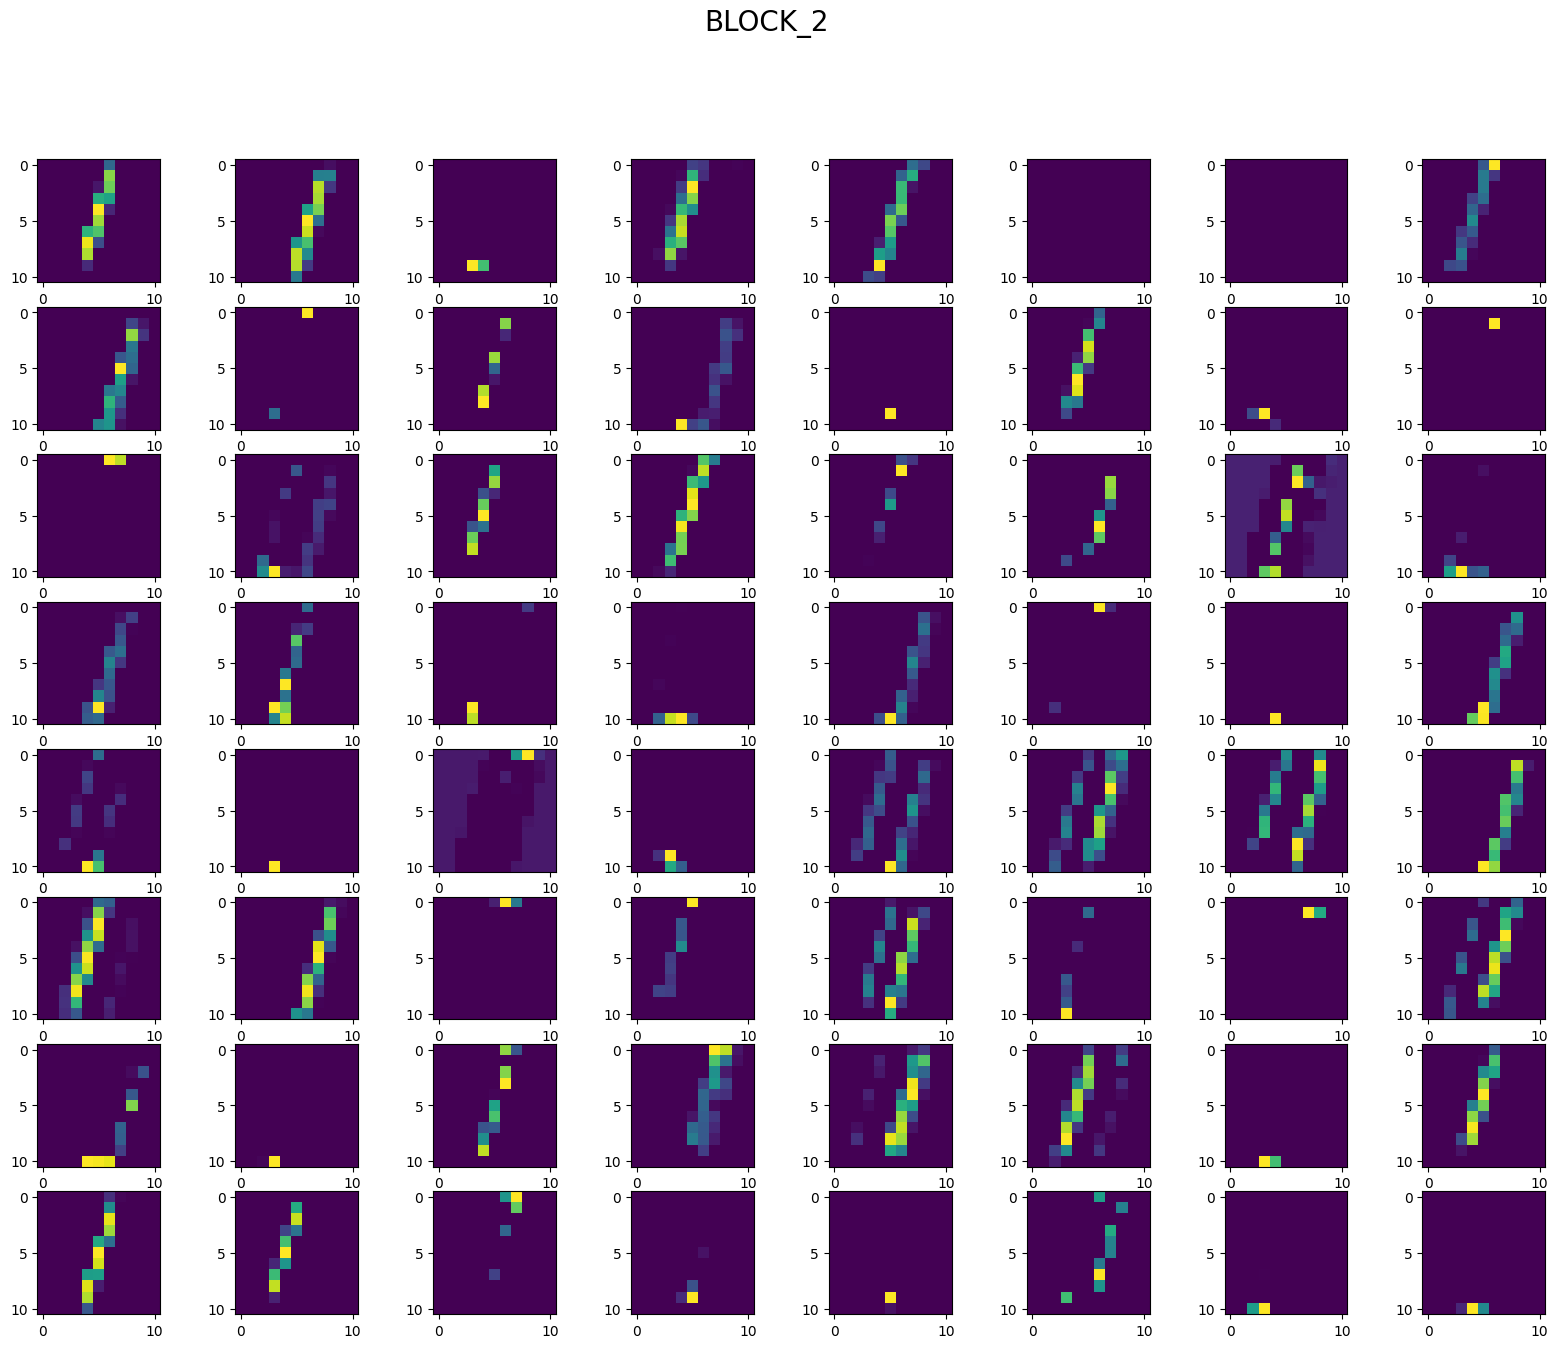

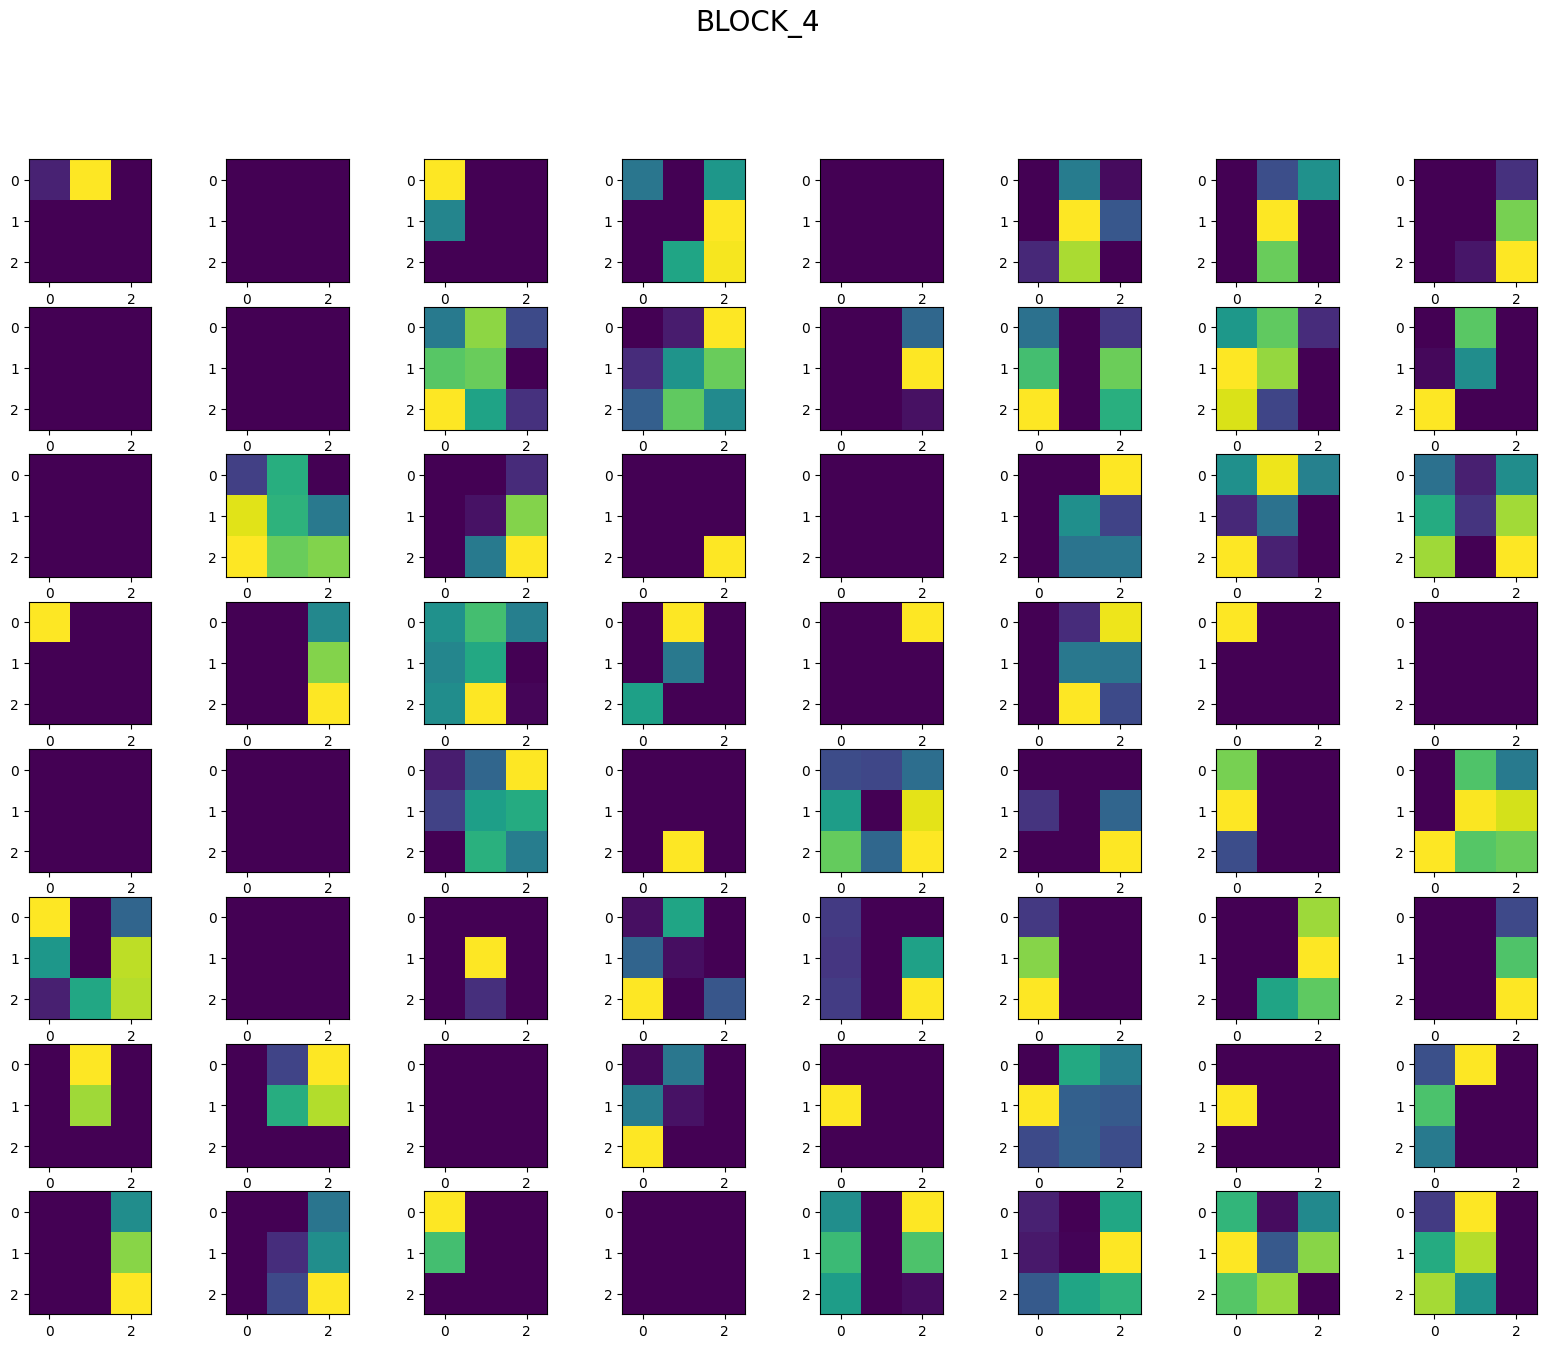

In [ ]:
# Esta porción de codigo muestra las 3 capas de convolución
model3 = model

blocks = [ 0, 2, 4]
outputs = [model3.layers[i].output for i in blocks]

model3 = models.Model( inputs= model3.inputs, outputs = outputs)

feature_map = model3.predict(x_test)

for i,fmap in zip(blocks,feature_map):
    fig = plt.figure(figsize=(20,15))

    fig.suptitle("BLOCK_{}".format(i) , fontsize=20)
    num_channels = fmap.shape[-1]
    for i in range(1,num_channels + 1):

        plt.subplot(8,8,i)
        plt.imshow(fmap[2, :, :, i - 1])

plt.show()

In [ ]:
for layer in model.layers:

    if 'conv' not in layer.name:
        continue
    filters , bias = layer.get_weights()
    print(layer.name , filters.shape)

conv2d (3, 3, 1, 32)
conv2d_1 (3, 3, 32, 64)
conv2d_2 (3, 3, 64, 64)


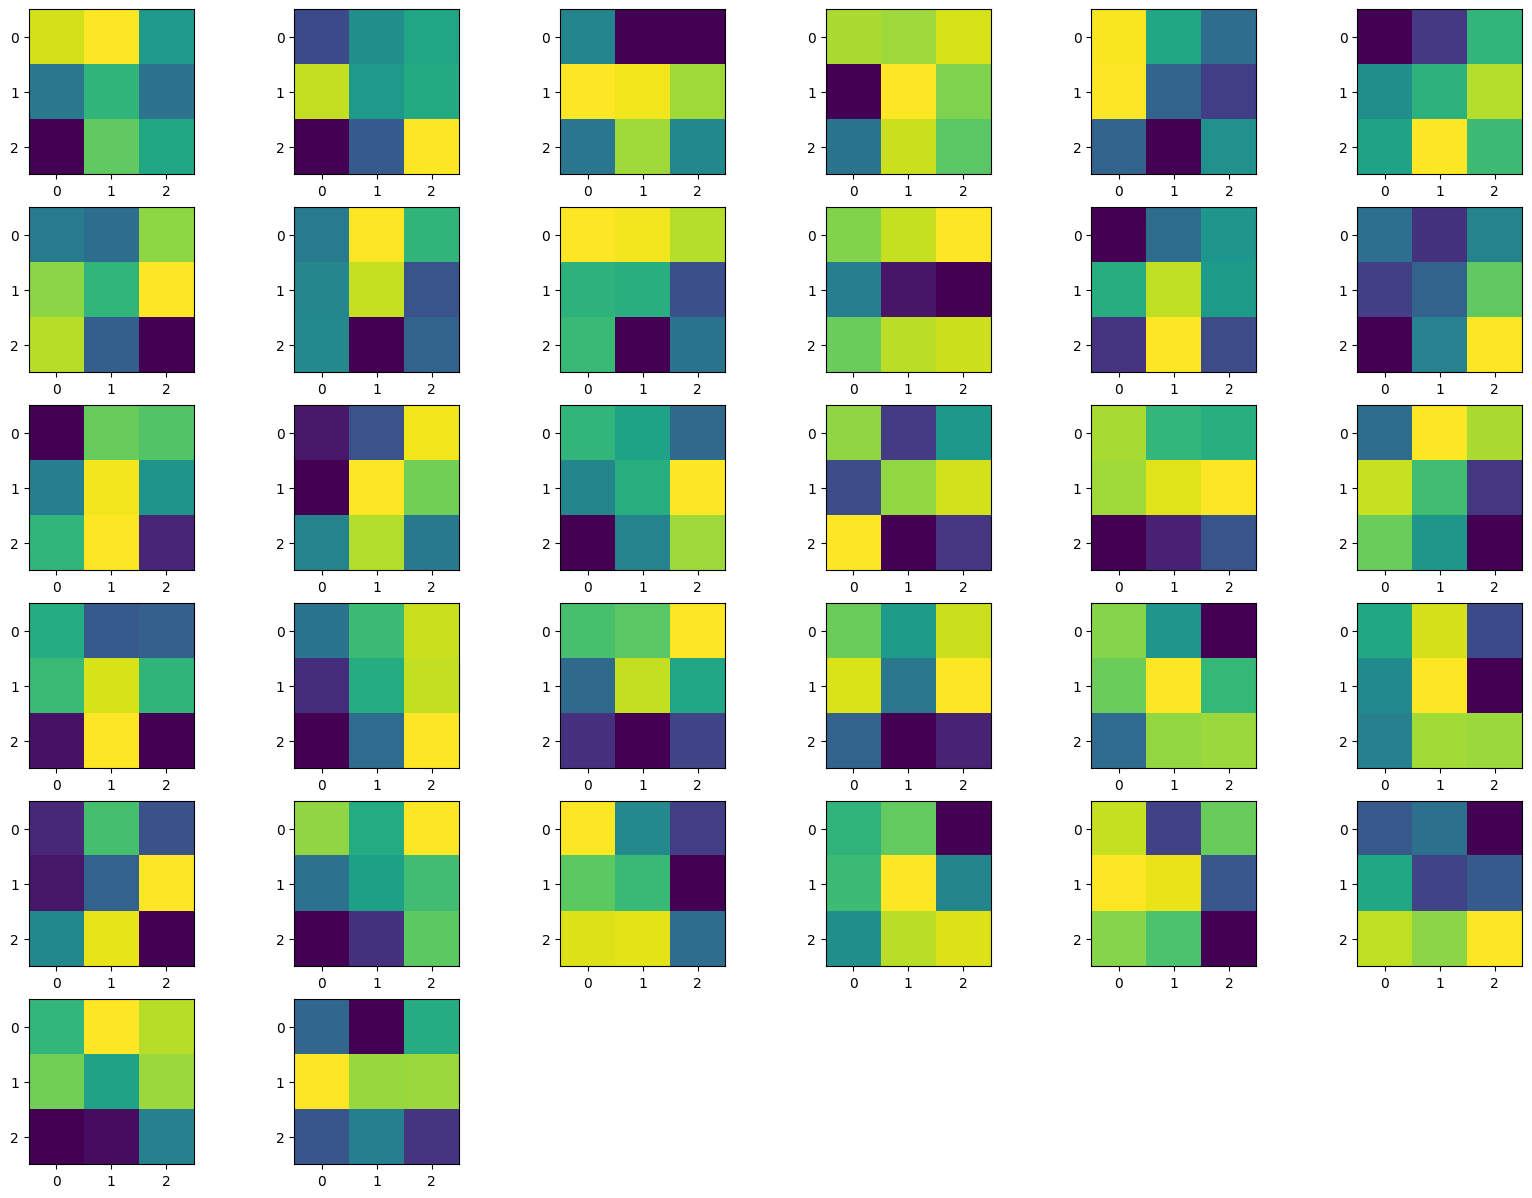

In [ ]:
# Obtenemos los filtros del x layer
filters , bias = model.layers[0].get_weights()
n_filters =32

fig = plt.figure(figsize=(20,15))
for i in range(n_filters):
    # obtenemos los filtros
    f = filters[:,:,:,i]

    # subplot para 6 filtros y 1 canal
    plt.subplot(6,6,i+1)
    plt.imshow(f[:,:,0])

#plot the filters
plt.show()